# "SNS 이벤트 당첨자 추첨 프로그램"  by 이정현b

### aka.BOBABA(뽀바바)

#### 프로그램 설명 ==================================================


인스타그램, 페이스북 등 각종 sns 이벤트 진행 시에 사용할 수 있는 추첨 프로그램임

1. 댓글 이벤트 관리
 - 기존 데이터에 이벤트 이름과 추첨 결과 열 추가
 - 마지막 파일 저장 시간 자동 입력
 
 
2. 댓글 이벤트 추첨기
 - 랜덤 뽑기
 - 조건에 맞는 랜덤 뽑기 (좋아요, 팔로우, 날짜, 정답맞추기)
 - 선착순 뽑기
 
#### 구현 시 활용한 파이썬 기능들=======================================
 1. 파일 입출력
 2. 데이터프레임 만들기
 3. 클래스, 상속
 4. 예외처리구문
 5. 인덱싱
 6. 랜덤함수
 7. 조건문 (for, if, while)
 
#### 잘 구현한 점 ===================================================
1. 첨부할 파일이 있을 경우, 없을 경우로 케이스를 나눠서 데이터셋을 받아줌
2. 추첨 케이스를 다양하게 나눠줌
3. 랜덤으로 추첨할 때마다 다르게 뽑히게끔 설정



#### 보완해야 할 점 =================================================
1. '날짜' 정수형 말고 to_datetime 쓰기
2. 추첨 완료 파일을 또 추첨할 경우 새로운 이벤트명 입력이 안됨
3. 현재 디렉터리 말고 절대경로로 받아도 되게끔
4. 데이터 분석을 한 통계치를 입력하고 싶었으나..
5. 인코딩
6. 변수 global - __init__

#### 추가하면 좋을 기능 ==============================================

1. 좋아요 차트 분석
2. 팔로우 차트 분석
3. 요일 및 순위별 차트
4. 블랙리스트 관리


* 발표자료 공유 폴더에 업로드하기

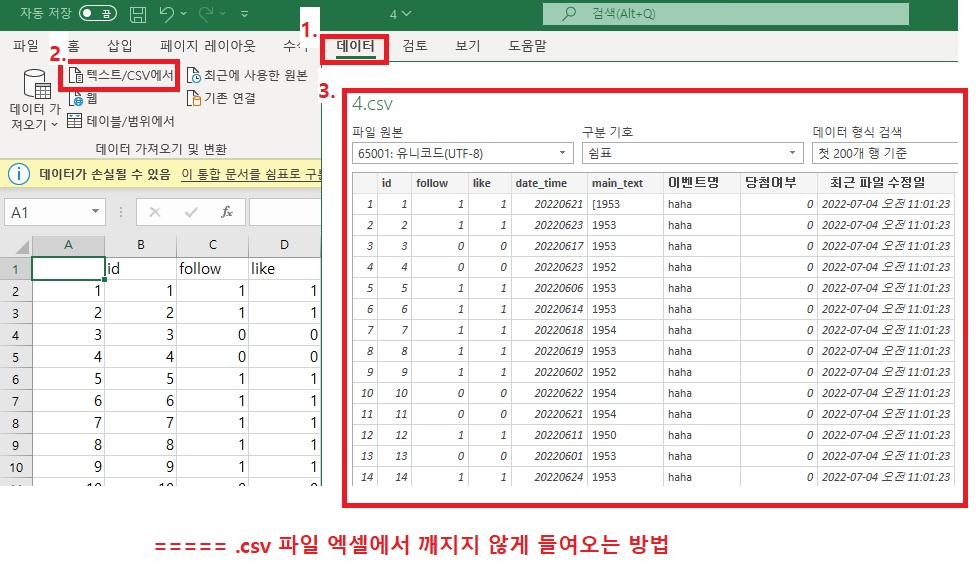

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
import random
import sys
import glob, os

# 파일 없는 경우 만드는 함수
def file_make():
    global file0
    
    id = []
    follow = []
    like = []
    date_time = []
    main_text = []
    
    empty_df = pd.DataFrame() # 빈 데이터프레임 만들기
    
    i = 0
    n = int(input("파일을 만듭니다. 입력 개수를 입력하세요 > "))
    print("아이디, 팔로우 여부, 좋아요 여부, 날짜, 댓글 내용을 입력하겠습니다.\n")


    
    for i in range(n):
        id.append(input("아이디 입력 | "))
        follow.append(int(input("팔로우 여부 | 숫자 입력 : 했음(1), 안했음(0)"))) 
        like.append(int(input("좋아요 여부 | 숫자 입력 : 했음(1), 안했음(0)")))
        date_time.append(int(input('날짜 입력 | ex.20220705 > ')))
        main_text.append(input('내용 입력 | > '))

    # 입력받은 개수만큼 만들어진 각각의 리스트를 시리즈로 전환    
    i1 = pd.Series(id)
    f1 = pd.Series(follow)
    k1 = pd.Series(like)
    t1 = pd.Series(date_time)
    m1 = pd.Series(main_text)
            
    df = pd.concat([i1,f1,k1,t1,m1],axis=1)  # 시리즈를 데이터프레임으로 전환
    
    df.rename(columns={0:'id',1:'follow',2:'like',3:'date_time',4:'main_text'},inplace=True)
      # 열 이름 변경
    
    df.index = df.index + 1  # 인덱스 1부터 시작하도록
    
    file0 = empty_df.append(df, ignore_index=True)  # 빈 데이터프레임에 붙이기
    
    print(file0)
    return file0



# 파일 입력받는 함수
def file_in():
    global file0
    global file1

    path = os.getcwd(); # 현재 경로(디렉토리) 저장
    original_fn = input('(확장자 포함) 불러올 파일명 입력 > \n')
    full_path = path + '/' + original_fn  # 현재 경로 + / + 파일명

    try:
        file1 = pd.read_csv(full_path,index_col=0)
        file0 = file1.copy()
        return file0
                
    except Exception as err:
        print(str(err))
        sys.exit()

        
        
# 만들어진 파일 내보내는 함수
def file_out():
    save_ox = input("저장하시겠습니까? > (y or n) : ")
    if save_ox == 'y':
        path = os.getcwd(); #현재 경로(디렉토리) 저장          
        result_fn = input('(확장자 포함) 저장할 파일명 입력 > \n')
        full_path2 = path + '/' + result_fn # 현재 경로 + / + 파일명
        
        s = datetime.now() # 현재 시간 저장
        s1 = s.strftime('%Y-%m-%d %H:%M:%S')
        file0['최근 파일 수정일'] = s1


        try:
            file0.to_csv(full_path2)
            
        except Exception as err:
            print(str(err))
            sys.exit()
            
    else :
        exit()
    
    
    
    
# Bbopgi : 랜덤 뽑기 함수
class Bbopgi:       
        
    def get_ran(self):
        global file0
        global file1
        global get_ran_num
        global event_name
        global get_ran_df
        global get_ran_dff
        
        print("랜덤 뽑기 입니다.")
                        
        get_ran_num = int(input("추첨 개수를 입력해주세요 > ")) 
        get_ran_df = get_ran_df.sample(n=get_ran_num).reset_index(drop=True)
          # 데이터프레임에서 개수만큼 랜덤 샘플 뽑기. 뽑을 때마다 새롭게
        get_ran_df['당첨여부'] = '1' # 당첨 여부 표시
        get_ran_df.index = get_ran_df.index + 1 # 인덱스 1부터로 설정
        
        print(get_ran_df)
        
        get_ran_dff = pd.concat([get_ran_df['id'],get_ran_df['당첨여부']],axis=1) 
                            # 기존 열 중에 key로 쓰일 id, 뽑은 것 표시해주는 당첨여부 만 남기기        
        file0 = pd.merge(file0,get_ran_dff,how='left',on='id') 
                            # 기존 데이터와 랜덤으로 뽑은 데이터 합치기. id를 키값으로 하고 기존 데이터 기준으로 left join
        file0 = file0.fillna(0) 
                            # fillna 함수로 nan값 채워주기
        file0.index = file0.index + 1
                            # 인덱스 1부터로 설정
        
                
        return file0
    

    
        
# 조건에 맞는 랜덤 뽑는 함수        
class Bbopgi_cond(Bbopgi):
    def get_ran_cond(self):
        global file0
        global get_ran_df
        
        print("조건에 맞는 랜덤 뽑기입니다.")
        print("1.팔로우 여부 2.좋아요 여부 3.날짜 4.댓글 내용")
        print("0 입력 시 종료")
        get_ran_con_num = int(input("번호를 입력해주세요 > \n")) 
                 
        if (get_ran_con_num == 0):
            sys.exit()
                
        elif (get_ran_con_num == 1):
            get_ran_df = file0.loc[file0['follow']==1]
            
        elif (get_ran_con_num == 2):
            get_ran_df = file0.loc[file0['like']==1]
                
        elif (get_ran_con_num == 3):
            d_num = int(input("날짜를 입력해주세요 ex.20220701 > \n")) 
            get_ran_df = file0[file0.date_time == d_num]
                
        elif (get_ran_con_num == 4):
            text_ox = input("정답을 입력해주세요 > ")
            get_ran_df = file0[file0.main_text.str.contains(text_ox,case=False,na=False)]
                    # 정답인 문자열을 포함하고 있는 조건 만족하는 내용 찾기    
        else :
            print("다시 입력해주세요.\n")
        
        super().get_ran()
        
class Bbopgi_fifo(Bbopgi):    
    def get_early(self):
        global file0
        global bbop_num
        
        print("선착순 뽑기 입니다.")
        bbop_num = int(input("추첨 개수를 입력해주세요 > "))
        get_ran_df = file0.iloc[0:bbop_num] # 인덱스번호로 입력받은 개수까지
        get_ran_df['당첨여부'] = '1'  
        get_ran_df.index = get_ran_df.index + 1

        print(get_ran_df)
        
        get_ran_dff = pd.concat([get_ran_df['id'],get_ran_df['당첨여부']],axis=1) 
                             # 기존 열 중에 key로 쓰일 id, 뽑은 것 표시해주는 당첨여부 만 남기기        
        
        file0 = pd.merge(file0,get_ran_dff,how='left',on='id') 
                            # 기존 데이터와 랜덤으로 뽑은 데이터 합치기. id를 키값으로 하고 기존 데이터 기준으로 left join
        file0 = file0.fillna(0) # fillna 함수로 nan값 채워주기
        file0.index = file0.index + 1
        
        return file0
        

    
# 메인함수 뽀바바
def bbobaba():
    global file0
    global event_name
    global get_ran_df
    
    print("="*50)
    print("SNS 이벤트 당첨자 추첨 프로그램에 오신 것을 환영합니다")
    print("="*50)
 
    while True :
        print(" 종료를 원하시면 q를 눌러주세요\n ")
        ans = input("*start* 입력할 파일이 있습니까? > (y or n)\n")
        
        if (ans == 'q') :
            sys.exit()
            
        elif (ans == ('y')) :
            
            file_in()
            
            print("1. 랜덤 뽑기")
            print("2. 랜덤 뽑기(조건형)")
            print("3. 선착순 뽑기")
            print("4. 통계보기")
            print("5. 종료")
    
            menu_num = int(input("번호를 입력하세요 > "))
            event_name = input("이벤트 이름을 입력해주세요 > \n")
            file0['이벤트명'] = event_name
            
            while True :
                if menu_num == 1 :
                    get_ran_df = file0
                    a = Bbopgi()
                    a.get_ran()
                    file_out()
                    break
        
                elif menu_num == 2 :
                    b = Bbopgi_cond()
                    b.get_ran_cond()
                    file_out()
                    break
        
                elif menu_num == 3 :
                    c = Bbopgi_fifo()
                    c.get_early()
                    file_out()
                    break
        
                elif menu_num == 4 :
                    print("tong()")
                    break
        
                elif menu_num == 5 :
                    print("프로그램 종료")
                    sys.exit()
        
                else :
                    print("잘못된 번호입니다. 다시 입력하세요\n")

        elif (ans == 'n') :
            file_make()
            file_out()
            
        else : 
            print("잘못된 번호입니다. 다시 입력하세요\n")

            
        
bbobaba()




In [ ]:
# 인스타그램 기준 데이터셋 만들기
# id : 아이디,follow : 팔로우 여부 ,like : 좋아요 여부 , date_time : 날짜 2022-06-01~30 ,main_text : 범위 1950~1954 / 정답은 1950

import numpy as np
import pandas as pd

np.random.seed(1) # 시드값 고정

id = np.arange(1,101) # 댓글 개수 100
i1 = pd.Series(id)

follow = np.random.randint(2,size=100) # 팔로우 여부 / 0 : 팔로우 x, 1: 팔로우 o
f1 = pd.Series(follow)

like = np.random.randint(2,size=100) # 좋아요 여부 / 0 : 좋아요 x, 1: 좋아요 o
k1 = pd.Series(follow)

date_time = np.random.randint(20220601,20220630,size=100) # 댓글 단 날짜 랜덤 지정
t1 = pd.Series(date_time)

main_text = np.random.randint(1950,1955,size=100) # 댓글 내용. 6.25가 일어난 년도는? 1950
main_text = str(main_text).split()
m1 = pd.Series(main_text)


df_event_data = pd.concat([i1,f1,k1,t1,m1],axis=1)
df_event_data.rename(columns={0:'id',1:'follow',2:'like',3:'date_time',4:'main_text'},inplace=True)

df_event_data.index = df_event_data.index+1

df_event_data

In [ ]:
df_event_data.to_csv('df_event_data.csv')